In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy import spatial
import os
import openpyxl
import requests
from zipfile import ZipFile  #assist in unzipping files
import gzip
from PIL import Image
import matplotlib.colors as mcolors
import random
import rle

In [2]:
#Change the working directory
os.chdir("D:/mutemwa")

#Define where the map ".rds" file is stored
mapsfolder = "D:/mutemwa/Maps Folder/"

In [3]:
url = "https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_KEN_shp.zip"

r = requests.get(url)
filename = mapsfolder + "Data.zip"
with open(filename, "wb") as f:
    f.write(r.content)

In [4]:
os.chdir("D:/mutemwa/Maps Folder/")
with ZipFile('Data.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [5]:
if os.path.exists(filename):
    os.remove(filename)
else:
    raise Exception("file does not exist!")

In [6]:
country_boundaries = gpd.read_file("gadm36_KEN_0.shp")
country_data = country_boundaries.drop("geometry", axis=1)
country = country_data["NAME_0"]

In [111]:
county_boundaries = gpd.read_file("gadm36_KEN_1.shp")
county_data = county_boundaries.drop("geometry", axis=1)
counties = county_data["NAME_1"]

In [8]:
constituency_boundaries = gpd.read_file("gadm36_KEN_2.shp")
constituency_data = constituency_boundaries.drop("geometry", axis=1)
constituencies = constituency_data["NAME_2"]

In [9]:
ward_boundaries = gpd.read_file("gadm36_KEN_3.shp")
ward_data = ward_boundaries.drop("geometry", axis=1)
wards = ward_data["NAME_3"]

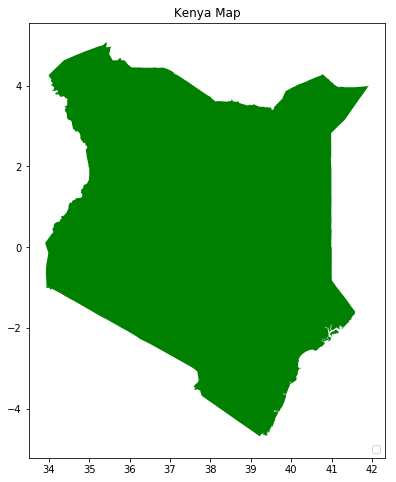

In [10]:
fig, ax = plt.subplots(1, figsize =(16, 8))
country_boundaries.plot(ax = ax, color ='green')
ax.set_title("Kenya Map")
plt.legend(country, loc="lower right")
plt.savefig('KenyaCountry.png', dpi=300, bbox_inches='tight')
plt.show()

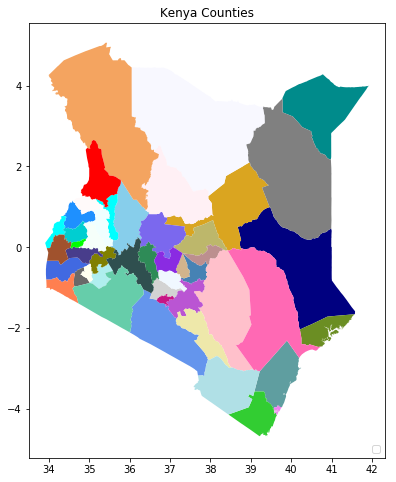

In [11]:
mycolours_counties = random.sample(list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)), k=len(counties))
fig, ax = plt.subplots(1, figsize =(16, 8))
county_boundaries.plot(ax = ax, color =mycolours_counties)
ax.set_title("Kenya Counties")
plt.legend(counties, loc="lower right")
plt.savefig('KenyaCounties.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
import pandas as pd
import numpy as np

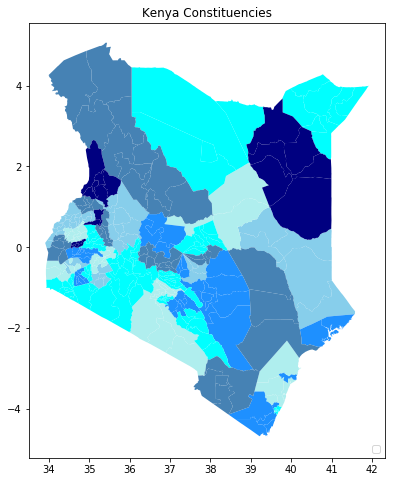

In [13]:
rl = rle.encode(constituency_data["NAME_1"])#constituencies_data
df = pd.DataFrame({'county': rl[0], 'count': rl[1]})

#rl = rle.encode(constituencies_data["NAME_1"])#constituencies_data
#df = pd.DataFrame(rl)
#lengths=df.loc[1]

lengths=len(df.county)#df.loc[1]
mycolours_constituencies = np.repeat(mycolours_counties, lengths)

fig, ax = plt.subplots(1, figsize =(16, 8))
constituency_boundaries.plot(ax = ax, color =mycolours_constituencies)
ax.set_title("Kenya Constituencies")
plt.legend(constituencies, loc="lower right")
plt.savefig('KenyaConstituencies.png', dpi=300, bbox_inches='tight')
plt.show()

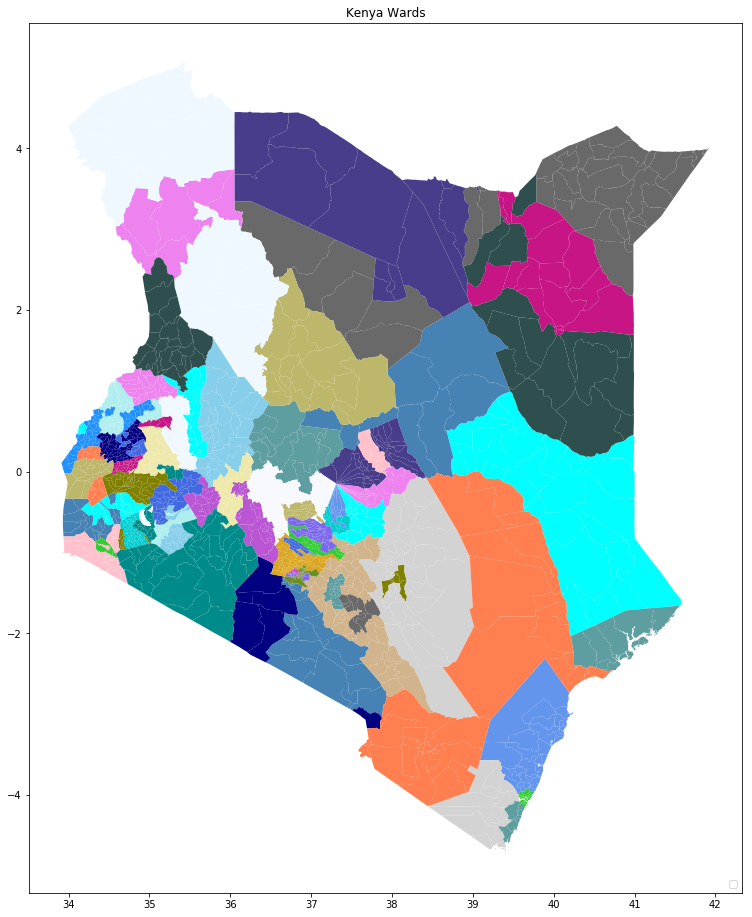

In [14]:
rl = rle.encode(ward_data["NAME_1"])
df = pd.DataFrame({'ward': rl[0], 'count': rl[1]})
lengths=len(df.ward)

mycolours_wards = np.repeat(mycolours_counties, lengths)

fig, ax = plt.subplots(1, figsize =(16, 16))
ward_boundaries.plot(ax = ax, color = mycolours_wards)
ax.set_title("Kenya Wards")
plt.legend([counties], loc="lower right")
plt.savefig('KenyaWards.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
gm = country_boundaries.loc[0,'geometry']

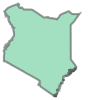

In [16]:
gm

In [17]:
ck = np.array(gm[1].exterior)

In [18]:
len(ck)

39

In [19]:
polygons = list(gm)
type(polygons)

list

In [20]:
len(polygons)

77

In [82]:
country_geom = country_boundaries.loc[0,'geometry']
country_polygons = list(country_geom)

country_GPS = pd.DataFrame()

for i in range(len(country_polygons)):
    polygons_GPS = pd.DataFrame()
    country_poly_poly = list(country_polygons)
    for j in range(len(country_poly_poly)):
        polygonGPS = np.array(country_poly_poly[j].exterior)
        polygonGPS = pd.DataFrame(polygonGPS_arr, columns = ["Longitude", "Latitude"])
        country = np.repeat("Kenya", polygonGPS.shape[0])
        kenyapoly = "Kenya" + str(i) + "Polygon" + str(j)
        CountryPolygon = np.repeat(kenyapoly, polygonGPS.shape[0])
        polygonGPS["country"] = country
        polygonGPS["CountryPolygon"] = CountryPolygon
        polygon_GPS = pd.concat([polygons_GPS, polygonGPS])
    
        country_GPS = pd.concat([country_GPS, polygon_GPS])#identation
    
country_GPS.to_csv("country_GPS.csv")

In [47]:
#Determine 10km Pixels In Each Country Pixel
grid = pd.read_csv('D:/mutemwa/ARC2PROCESSING/grid.csv')

grid["PixelID"] = str(grid["PixelID"])

grid["Latitude"] = grid["Latitude"].apply(str)
grid["Latitude"] = grid["Latitude"].apply(float)

grid["Longitude"] = grid["Longitude"].apply(str)
grid["Longitude"] = grid["Longitude"].apply(float)

grid["PixelName"] = grid["PixelName"].apply(str)

In [48]:
Country = np.repeat("NA", grid.shape[0])
countrypolygons = str(country_GPS["CountryPolygon"].drop_duplicates)
#for countrypolygon in countrypolygons:
 #   countrypolygonGPS = country_GPS.loc[np.where(country_GPS["CountryPolygon"] == countrypolygon)]  

In [49]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
for countrypolygon in countrypolygons:
    countrypolygonGPS = country_GPS.loc[np.where(country_GPS["CountryPolygon"] == countrypolygon)]
    coord = Point(np.array(grid["Longitude"], grid["Latitude"]))
    poly = Polygon(countrypolygonGPS["Longitude"], countrypolygonGPS["Latitude"])
    points = poly.contains(coord)


In [167]:
county_boundaries.head()#['geometry']#.loc[0,'geometry']

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,KEN,Kenya,KEN.1_1,Baringo,None,None,County,County,30,KE.BA,"(POLYGON ((35.67241287 1.07305849, 35.67227554..."
1,KEN,Kenya,KEN.2_1,Bomet,None,None,County,County,36,KE.BO,"POLYGON ((35.26192856 -1.01562488, 35.26177216..."
2,KEN,Kenya,KEN.3_1,Bungoma,None,None,County,County,39,KE.BN,"POLYGON ((34.45475769 0.47292694, 34.45463181 ..."
3,KEN,Kenya,KEN.4_1,Busia,None,None,County,County,40,KE.BS,"POLYGON ((34.24632263 0.31445998, 34.24585724 ..."
4,KEN,Kenya,KEN.5_1,Elgeyo-Marakwet,None,None,County,County,28,KE.EM,"(POLYGON ((35.58806229 0.1745251, 35.58784485 ..."


In [127]:
#[x for x in county_boundaries['geometry']]
county_polygons = []
for i in range(len(county_boundaries['geometry'])):
    county_polygons.append(county_boundaries['geometry'][i])

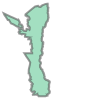

In [174]:
[x for x in county_boundaries['geometry'][4]][0]

In [74]:
#Determine the polygons per county
county_geom = county_boundaries.loc['geometry']
county_polygons = list(county_geom)

county_GPS = pd.DataFrame()

for i in np.arange(len(county_polygons)):
    polygons_GPS = pd.DataFrame()
    county_poly_poly = list(county_polygons)
    for j in np.arange(len(county_poly_poly)):
        polygonGPS = np.array(county_poly_poly[j].exterior)
        polygonGPS = pd.DataFrame(polygonGPS, columns = ["Longitude", "Latitude"])
        county = np.repeat(counties.loc[i], polygonGPS.shape[0])
        county_poly = counties.loc[i] + str(i) + "Polygon" + str(j)
        CountyPolygon = np.repeat(county_poly, polygonGPS.shape[0])
        polygonGPS["county"] = county
        polygonGPS["CountyPolygon"] = CountyPolygon
        polygon_GPS = pd.concat([polygons_GPS, polygonGPS])
        
        county_GPS = pd.concat([county_GPS, polygon_GPS])
        
county_GPS.to_csv("county_GPS.csv")   

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

In [75]:
county_polygons

In [87]:
#Determine the pixels per constituency
constituency_geom = constituency_boundaries['geometry']#constituency_boundaries.loc[0,'geometry']
constituency_polygons = list(constituency_geom)
len(constituency_polygons)

301

In [83]:
#Determine the pixels per constituency
constituency_geom = constituency_boundaries['geometry']#constituency_boundaries.loc[0,'geometry']
constituency_polygons = list(constituency_geom)

constituency_GPS = pd.DataFrame()
for i in np.arange(len(constituency_polygons)):
    polygons_GPS = pd.DataFrame()
    constituency_poly_poly = list(constituency_polygons)
    for j in np.arange(len(constituency_poly_poly)):
        try:
            polygonGPS = np.array(constituency_poly_poly[j].exterior)
        except AttributeError:
            pass
            #polygonGPS = np.array([x.exterior.coords for x in constituency_poly_poly[j]])
            
        polygonGPS = pd.DataFrame(polygonGPS, columns = ["Longitude", "Latitude"])
        constituency = np.repeat(constituencies.loc[i], polygonGPS.shape[0])
        constituency_poly = constituencies.loc[i] + str(i) + "Polygon" + str(j)
        ConstituencyPolygon = np.repeat(constituency_poly, polygonGPS.shape[0])
        polygonGPS["constituency"] = constituency
        polygonGPS["ConstituencyPolygon"] = ConstituencyPolygon
        polygon_GPS = pd.concat([polygons_GPS, polygonGPS])
        
    constituency_GPS = pd.concat([constituency_GPS, polygon_GPS])
        
constituency_GPS.to_csv("constituency_GPS.csv")   

In [324]:
for k in range(len(constituencies)):
    constituency_geom = constituency_boundaries.loc[k,'geometry']
    constituency_polygons = list(constituency_geom)

    constituency_GPS = pd.DataFrame()
    for i in np.arange(len(constituency_polygons)):
        polygons_GPS = pd.DataFrame()
        constituency_poly_poly = list(constituency_polygons)
        for j in np.arange(len(constituency_poly_poly)):
            polygonGPS = np.array(constituency_poly_poly[j].exterior)
            polygonGPS = pd.DataFrame(polygonGPS, columns = ["Longitude", "Latitude"])
            constituency = np.repeat(constituencies.loc[i], polygonGPS.shape[0])
            constituency_poly = constituencies.loc[i] + str(i) + "Polygon" + str(j)
            ConstuencyPolygon = np.repeat(constituency_poly, polygonGPS.shape[0])
            polygonGPS["constituency"] = constituency
            polygonGPS["ConstituencyPolygon"] = ConstituencyPolygon
            polygon_GPS = pd.concat([polygons_GPS, polygonGPS])
        
        constituency_GPS = pd.concat([constituency_GPS, polygon_GPS])
        
constituency_GPS.to_csv("constituency_GPS.csv")   

TypeError: 'Polygon' object is not iterable

In [306]:
pip install turfpy

  Created wheel for turfpy: filename=turfpy-0.0.6-py3-none-any.whl size=38011 sha256=1cd0a14e9eb8c25a844243facb50001e4fd608736078c6e8e54d3cf3deddf4a8
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b5\85\02\220fb2b91d6828336f6eb995a499bcc04980946de4428c64be
Successfully built turfpy
Note: you may need to restart the kernel to use updated packages.


In [307]:
from turfpy.measurement import boolean_point_in_polygon
boolean_point_in_polygon(coord, poly)

Exception: polygon is required

In [335]:
geo = []
for k in range(len(constituencies)):
    constituency_geom = constituency_boundaries.loc[k,'geometry']
    geo.append(constituency_geom)
const = list(geo)
constituency_polygons = const

constituency_GPS = pd.DataFrame()
for i in np.arange(len(constituency_polygons)):
    polygons_GPS = pd.DataFrame()
    constituency_poly_poly = list(constituency_polygons)
    for j in np.arange(len(constituency_poly_poly)):
        polygonGPS = np.array(constituency_poly_poly[j].exterior)
        polygonGPS = pd.DataFrame(polygonGPS, columns = ["Longitude", "Latitude"])
        constituency = np.repeat(constituencies.loc[i], polygonGPS.shape[0])
        constituency_poly = constituencies.loc[i] + str(i) + "Polygon" + str(j)
        ConstituencyPolygon = np.repeat(constituency_poly, polygonGPS.shape[0])
        polygonGPS["constituency"] = constituency
        polygonGPS["ConstituencyPolygon"] = ConstituencyPolygon
        polygon_GPS = pd.concat([polygons_GPS, polygonGPS])
        
    constituency_GPS = pd.concat([constituency_GPS, polygon_GPS])
        
constituency_GPS.to_csv("constituency_GPS.csv")   

In [175]:
county_boundaries

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,KEN,Kenya,KEN.1_1,Baringo,None,None,County,County,30,KE.BA,"(POLYGON ((35.67241287 1.07305849, 35.67227554..."
1,KEN,Kenya,KEN.2_1,Bomet,None,None,County,County,36,KE.BO,"POLYGON ((35.26192856 -1.01562488, 35.26177216..."
2,KEN,Kenya,KEN.3_1,Bungoma,None,None,County,County,39,KE.BN,"POLYGON ((34.45475769 0.47292694, 34.45463181 ..."
3,KEN,Kenya,KEN.4_1,Busia,None,None,County,County,40,KE.BS,"POLYGON ((34.24632263 0.31445998, 34.24585724 ..."
4,KEN,Kenya,KEN.5_1,Elgeyo-Marakwet,None,None,County,County,28,KE.EM,"(POLYGON ((35.58806229 0.1745251, 35.58784485 ..."
5,KEN,Kenya,KEN.6_1,Embu,None,None,County,County,14,KE.EB,"(POLYGON ((37.30928421 -0.14896464, 37.3091354..."
6,KEN,Kenya,KEN.7_1,Garissa,None,None,County,County,7,KE.GA,"POLYGON ((40.43328857 -1.93511963, 40.41827393..."
7,KEN,Kenya,KEN.8_1,Homa Bay,None,None,County,County,43,KE.HB,"POLYGON ((34.48337173 -0.7924730800000001, 34...."
8,KEN,Kenya,KEN.9_1,Isiolo,None,None,County,County,11,KE.IS,"POLYGON ((38.56964111 -0.01509014, 38.56927872..."
9,KEN,Kenya,KEN.10_1,Kajiado,None,None,County,County,34,KE.KJ,"POLYGON ((37.87513351 -3.03994107, 37.87487793..."


In [179]:
k = county_boundaries[['NAME_1', 'TYPE_1','geometry']].head().copy()

In [180]:
k

,NAME_1,TYPE_1,geometry
0,Baringo,County,"(POLYGON ((35.67241287 1.07305849, 35.67227554..."
1,Bomet,County,"POLYGON ((35.26192856 -1.01562488, 35.26177216..."
2,Bungoma,County,"POLYGON ((34.45475769 0.47292694, 34.45463181 ..."
3,Busia,County,"POLYGON ((34.24632263 0.31445998, 34.24585724 ..."
4,Elgeyo-Marakwet,County,"(POLYGON ((35.58806229 0.1745251, 35.58784485 ..."


In [184]:
type(k['geometry'][0])

shapely.geometry.multipolygon.MultiPolygon